In [5]:
import logging
import sys


# 기존 핸들러들 제거 (중복 방지)
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

# 로깅 설정 추가 (콘솔 + 파일)
logging.basicConfig(
    level=logging.DEBUG,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.StreamHandler(sys.stdout),  # 노트북 출력으로 로그 표시
    ]
)

# 루트 로거 레벨 설정
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [ ]:
from generator.workflow_v1.test_workflow_3 import app_v4

from generator.common.utils import pretty_print_scenario
from generator.common.test_artifact_maker import make_test_artifacts

# task_id = "session-20251002-052932-151e52e9"
task_id = "session-20251002-040520-28a9dc6c"
job_id = "test+job_id"

print("🔄 아티팩트 생성 중...")
# artifacts = make_test_artifacts(task_id, limit=10000)
artifacts = make_test_artifacts(task_id)

print(f"\n✅ 총 {len(artifacts):,}개 아티팩트 로드 완료")

🔄 아티팩트 생성 중...
[2025-10-13 11:29:17] DataEncoder - Converted WebKit urls.last_visit_time to datetime
[2025-10-13 11:29:17] DataEncoder - Converted WebKit visits.visit_time to datetime
[2025-10-13 11:29:17] DataEncoder - Converted WebKit downloads.start_time to datetime
[2025-10-13 11:29:17] DataEncoder - Converted WebKit downloads.end_time to datetime
[2025-10-13 11:29:17] DataEncoder - Converted WebKit downloads.last_access_time to datetime
[2025-10-13 11:29:17] DataEncoder - Converted WebKit logins.date_created to datetime
[2025-10-13 11:29:17] DataEncoder - Converted WebKit logins.date_last_used to datetime
[2025-10-13 11:29:17] DataEncoder - Converted WebKit logins.date_received to datetime
[2025-10-13 11:29:17] DataEncoder - Converted WebKit logins.date_password_modified to datetime
[2025-10-13 11:29:17] DataEncoder - Converted WebKit logins.date_last_filled to datetime
[2025-10-13 11:29:17] DataEncoder - Cookies failed
[2025-10-13 11:29:17] DataEncoder - Converted Unix autofill.d

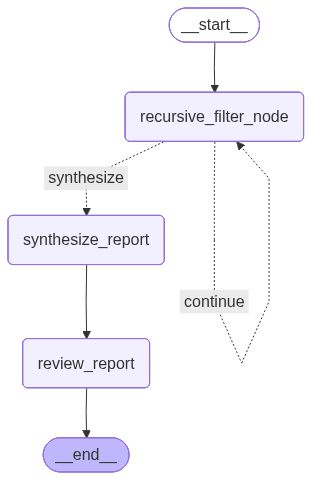

In [7]:
from IPython.display import Image, display
display(Image(app_v4.get_graph(xray=True).draw_mermaid_png()))

In [8]:
print(f"\n🚀 분석 시작...")
initial_state = {
    "artifact_chunks": [artifacts],
    "current_chunk_index": 0,
    "intermediate_results": [],
    "final_report": None,
    "job_id": job_id,
    "task_id": task_id,
    "filter_iteration": 0,           # 🆕 초기화
    "target_artifact_count": 2500,   # 🆕 목표 설정
    "current_strictness": "very_strict" 
}

import time
start_time = time.time()

final_state = app_v4.invoke(initial_state)
elapsed_time = time.time() - start_time

print(f"\n⏱️  총 처리 시간: {elapsed_time:.1f}초 ({elapsed_time/60:.1f}분)")
print(f"🔍 필터링된 중요 아티팩트: {sum(len(r.important_artifacts) for r in final_state['intermediate_results'])}개")



🚀 분석 시작...

🔄 필터링 반복 1/5: VERY_STRICT
  - 입력: 원본 아티팩트
  - 현재 아티팩트: 7,592개
  - 필터링 강도: very_strict
  - 목표 비율: 1.5%
  - 예상 개수: ~113개
  - 목표 개수: 2,500개
  - 총 청크 수: 26개

📦 총 2개 배치로 처리

📦 배치 1/2 (청크 1-20)...
✅ 청크 2: 25개 발견
✅ 청크 3: 50개 발견
✅ 청크 4: 77개 발견
✅ 청크 6: 41개 발견
✅ 청크 1: 195개 발견
✅ 청크 5: 221개 발견
✅ 청크 8: 2개 발견
✅ 청크 11: 126개 발견
✅ 청크 12: 7개 발견
✅ 청크 9: 277개 발견
✅ 청크 7: 300개 발견
✅ 청크 10: 300개 발견
✅ 청크 15: 12개 발견
✅ 청크 14: 128개 발견
✅ 청크 16: 10개 발견
✅ 청크 17: 3개 발견
✅ 청크 13: 261개 발견
✅ 청크 19: 7개 발견
✅ 청크 20: 24개 발견
✅ 청크 18: 229개 발견
  ✅ 배치 1 완료: 2295개 발견
📦 배치 2/2 (청크 21-26)...
✅ 청크 21: 23개 발견
✅ 청크 22: 4개 발견
✅ 청크 24: 28개 발견
✅ 청크 26: 1개 발견
✅ 청크 23: 294개 발견
✅ 청크 25: 261개 발견
  ✅ 배치 2 완료: 611개 발견

📊 반복 1 결과:
  - 필터링된 개수: 2,906개
  - 목표 대비: 2906/2500 (116.2%)

🔄 목표 미달. 필터링 강도를 높여 재시도...


🔄 필터링 반복 2/5: STRICT
  - 입력: 1차 필터링 결과
  - 현재 아티팩트: 2,906개
  - 필터링 강도: strict
  - 목표 비율: 2.5%
  - 예상 개수: ~72개
  - 목표 개수: 2,500개
  - 총 청크 수: 10개

📦 총 1개 배치로 처리

📦 배치 1/1 (청크 1-10)...
✅ 청크 2: 46개 발견
✅ 청크 4: 3개 발견
✅ 청크 5: 10개 발견


In [9]:
print("\n" + "="*80)
print("--- 📋 최종 분석 결과 ---")
print("="*80)
pretty_print_scenario(final_state["final_report"])

🔍 필터링된 중요 아티팩트: 1222개

--- 📋 최종 분석 결과 ---
📜 시나리오 분석 보고서: 내부 정보 유출 및 이직 정황

[ 보고서 개요 ]
  - 사용자가 이직을 준비하며 내부 메일 및 구글 드라이브를 통해 주요 업무 파일을 수집하고, 디스코드를 이용해 외부로 유출한 후 증거 인멸을 시도한 정황을 확인했습니다.

[ 식별 정보 ]
  - Job ID: test+job_id
  - Task ID: session-20251002-040520-28a9dc6c

[ 재구성된 공격 단계 (Timeline) ]
--------------------------------------------------------------------------------

▶ Step 1: [2025-07-31 01:24:34]
  - 내용: 사용자가 잡코리아, 사람인 등 채용 사이트에서 '보안운영' 직무를 검색하며 이직을 준비하는 정황을 확인했습니다.
  - 연관 아티팩트: [307c297a-4a7e-41d2-bb65-b76634079c23, 6e19b444-0008-4f2e-a401-890dc2c8adb9, 12eaff1c-d1da-4b22-b569-1e1779f068f5, 86a883d2-b920-4c93-b75a-bb99e92e3201]

▶ Step 2: [2025-08-08 01:31:21]
  - 내용: 내부 메일 시스템(kisia.or.kr)에 접속하여 '김지숙', '유선동' 등 특정 임직원명을 검색하고, 관련 업무 파일을 다운로드하여 정보를 수집했습니다.
  - 연관 아티팩트: [5035af6f-a0b0-4eb0-b20d-d5fe7c02ddb9, a6c51303-b4c4-4c22-b266-5f453968e439, e71f8308-c8d8-42f7-b6f5-a327bf5decbb, b2b0115c-72cf-4851-af55-8e2864d23625, c9768b13-8339-4f6f-b340-291a3904c1a6, 3c7b4e38-bf27-461a-8251-e